In [2]:
#1
#逆行列の求め方
from pprint import pprint
import scipy.linalg as linalg   # SciPy Linear Algebra Library
import numpy as np

A = np.array([[4,-1,-1],[1,2,-1],[3,-1,0]])
inv_A = linalg.inv(A)
print(inv_A)

np.dot(inv_A,A)

[[-0.16666667  0.16666667  0.5       ]
 [-0.5         0.5         0.5       ]
 [-1.16666667  0.16666667  1.5       ]]


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

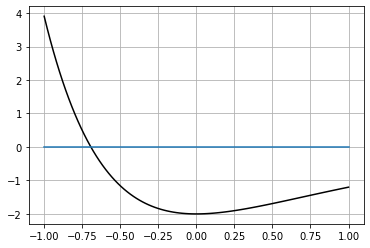

In [20]:
#2
%matplotlib inline
import matplotlib.pyplot as plt
#↓！！！！f(x)の関数！！！！変えるならここ！



def func(x):
    return -4*np.exp(-x)+2*np.exp(-2*x)

def df(x):
    return 4*np.exp(-x) - 4*np.exp(-2*x)

from scipy.optimize import fsolve
x0 = fsolve(func, -1.0)[0]

x1=-1
x2=1
x = np.linspace(x1, x2, 100)
y = func(x)
plt.plot(x, y, color = 'k')
plt.plot([x1,x2],[0,0])#青線
plt.grid()
plt.show()

In [21]:
#二分法

x1, x2 = -1,0
f1, f2 = func(x1), func(x2)
print('%+15s %+15s %+15s %+15s'  % ('x1','x2','f1','f2'))
print('%+15.10f %+15.10f %+15.10f %+15.10f' % (x1,x2,f1,f2))

list_bisec = [[0],[abs(x1-x0)]]
for i in range(0, 10):
    x = (x1 + x2)/2
    f = func(x)
    if (f*f1>=0.0):
        x1, f1 = x, f
        list_bisec[0].append(i)
        list_bisec[1].append(abs(x1-x0))
    else:
        x2, f2 = x, f
        list_bisec[0].append(i)
        list_bisec[1].append(abs(x2-x0))

    print('%+15.10f %+15.10f %+15.10f %+15.10f' % (x1,x2,f1,f2))

list_bisec
print()

             x1              x2              f1              f2
  -1.0000000000   +0.0000000000   +3.9049848840   -2.0000000000
  -1.0000000000   -0.5000000000   +3.9049848840   -1.1583214259
  -0.7500000000   -0.5000000000   +0.4953780742   -1.1583214259
  -0.7500000000   -0.6250000000   +0.4953780742   -0.4922979148
  -0.7500000000   -0.6875000000   +0.4953780742   -0.0447964325
  -0.7187500000   -0.6875000000   +0.2128474183   -0.0447964325
  -0.7031250000   -0.6875000000   +0.0810265592   -0.0447964325
  -0.6953125000   -0.6875000000   +0.0173789137   -0.0447964325
  -0.6953125000   -0.6914062500   +0.0173789137   -0.0138911236
  -0.6933593750   -0.6914062500   +0.0016980959   -0.0138911236
  -0.6933593750   -0.6923828125   +0.0016980959   -0.0061079375



In [24]:
#ニュートン法
x1 = -1
f1 = func(x1)
list_newton = [[0],[abs(x1-x0)]]
print('%-15.10f %+24.25f' % (x1,f1))
for i in range(0, 10):
    x1 = x1 - f1 / df(x1)
    f1 =func(x1)
    print('%-15.10f %+24.25f' % (x1,f1))
    list_newton[0].append(i)
    list_newton[1].append(abs(x1-x0))

list_newton
print()

-1.0000000000   +3.9049848840251204507012517
-0.7909883534   +0.9068233052059522236731937
-0.7057281263   +0.1025656393923117803979039
-0.6933803632   +0.0018661139743176846650385
-0.6931472621   +0.0000006522702786782019757
-0.6931471806   +0.0000000000000799360577730
-0.6931471806   +0.0000000000000000000000000
-0.6931471806   +0.0000000000000000000000000
-0.6931471806   +0.0000000000000000000000000
-0.6931471806   +0.0000000000000000000000000
-0.6931471806   +0.0000000000000000000000000



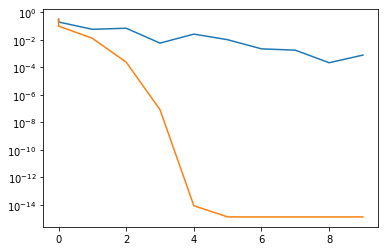

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

X = list_bisec[0]
Y = list_bisec[1]
plt.plot(X, Y)

X = list_newton[0]
Y = list_newton[1]
plt.plot(X, Y)

plt.yscale("log") # y軸を対数目盛に
plt.show()

In [7]:
#3
from decimal import *

def pretty_p(result,a,b,operator):
    print('context.prec:{}'.format(getcontext().prec))
    print(' %20.14f' % (a))
    print( '%1s%20.14f' % (operator, b))
    print('-----------')
    print( ' %20.14f' % (result))

    
def waru(result,a,b,operator):
    print('context.prec:{}'.format(getcontext().prec))
    print(' %20.14f' % (a))
    print( '%1s%20.14f' % (operator, b))
    print('-----------')
    print( ' %20.14f' % (result))

In [8]:
#5桁
n = 5
getcontext().prec = n

#最後の「100」とかの値で有効数字を調整する
a=Decimal('0.31415').quantize(Decimal(10) ** -n)*10
b=Decimal('0.31234').quantize(Decimal(10) ** -n)*10
pretty_p(a-b,a,b,'-')

#4桁
n = 4
getcontext().prec = n

a=Decimal('0.31415').quantize(Decimal(10) ** -n)*10
b=Decimal('0.31234').quantize(Decimal(10) ** -n)*10
pretty_p(a-b,a,b,'-')

#3桁
n = 3
getcontext().prec = n

a=Decimal('0.31415').quantize(Decimal(10) ** -n)*10
b=Decimal('0.31234').quantize(Decimal(10) ** -n)*10
pretty_p(a-b,a,b,'-')

#2桁
n = 2
getcontext().prec = n

a=Decimal('0.31415').quantize(Decimal(10) ** -n)*10
b=Decimal('0.31234').quantize(Decimal(10) ** -n)*10
pretty_p(a-b,a,b,'-')

context.prec:5
     3.14150000000000
-    3.12340000000000
-----------
     0.01810000000000
context.prec:4
     3.14200000000000
-    3.12300000000000
-----------
     0.01900000000000
context.prec:3
     3.14000000000000
-    3.12000000000000
-----------
     0.02000000000000
context.prec:2
     3.10000000000000
-    3.10000000000000
-----------
     0.00000000000000


In [9]:
n = 5
getcontext().prec = n

a=Decimal('0.31415').quantize(Decimal(10) ** -n)*10
b=Decimal('0.31234').quantize(Decimal(10) ** -n)*10
c=Decimal('0.80000').quantize(Decimal(10) ** -n)
waru(c/(a-b),a-b,c,'/')

#4桁
n = 4
getcontext().prec = n

a=Decimal('0.31415').quantize(Decimal(10) ** -n)*10
b=Decimal('0.31234').quantize(Decimal(10) ** -n)*10
c=Decimal('0.80000').quantize(Decimal(10) ** -n)
waru(c/(a-b),a-b,c,'/')

#3桁
n = 3
getcontext().prec = n

a=Decimal('0.31415').quantize(Decimal(10) ** -n)*10
b=Decimal('0.31234').quantize(Decimal(10) ** -n)*10
c=Decimal('0.80000').quantize(Decimal(10) ** -n)
waru(c/(a-b),a-b,c,'/')

#2桁
n = 2
getcontext().prec = n

a=Decimal('0.31415').quantize(Decimal(10) ** -n)*10
b=Decimal('0.31234').quantize(Decimal(10) ** -n)*10
c=Decimal('0.80000').quantize(Decimal(10) ** -n)

#符号の調整（割り算）
waru(c/(a-b),a-b,c,'/')

context.prec:5
     0.01810000000000
/    0.80000000000000
-----------
    44.19900000000000
context.prec:4
     0.01900000000000
/    0.80000000000000
-----------
    42.11000000000000
context.prec:3
     0.02000000000000
/    0.80000000000000
-----------
    40.00000000000000


DivisionByZero: [<class 'decimal.DivisionByZero'>]

[-5.65471459e+02 -8.85879000e-01  4.73656429e-01]


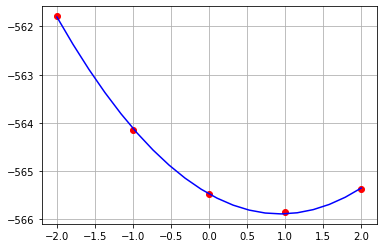

In [10]:
#4

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#！！！元の関数を変えてね！！！
def f(x, a0, a1 ,a2):
    return a0 + a1*x + a2*x**2

xdata = np.array([-2,-1,0,1,2])
ydata = np.array([-561.78952,-564.14261,-565.47273,-565.8513,-565.36457])
plt.plot(xdata,ydata, 'o', color='r')

params, cov = curve_fit(f, xdata, ydata)
print(params)

x =np.linspace(-2,2,20)
y = f(x,params[0],params[1],params[2])
plt.plot(x,y, color='b')

plt.grid()
plt.show()

In [30]:
#4
%matplotlib inline
import matplotlib.pyplot as plt

def my_plot(xx, vv, tt):
    plt.plot(tt, xx, color = 'b', linestyle='--',label="height")
    plt.plot(tt, vv, color = 'r', label="velocity")
    plt.legend()
    plt.xlabel('time')
    plt.ylabel('height and velocity')
    plt.grid()
    plt.show()

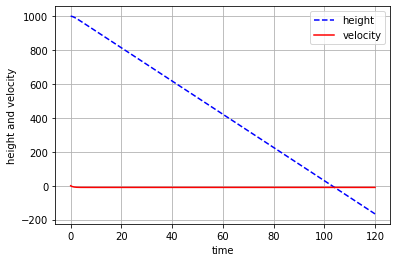

In [32]:
from sympy import *
v, f = symbols('v f', cls=Function)
cc, t, m, x, g= symbols('cc t m x g')
# dsolve(f(x).diff(x, x) + f(x), f(x))
dsolve(v(t).diff(t)+cc/m*v(t)+g,v(t))

def euler2(x0, v0):
  v1 = v0 + (-cc * v0- g) * dt
  x1 = x0 + v0 * dt
  return [x1, v1]

g, dt, cc=9.8, 0.1, 1.0 #重力,時間の刻み,空気抵抗
# tt,xx,vv=[0.0],[0.0],[-10]
tt,xx,vv=[0.0],[1000.0],[0.0]
t = 0.0
for i in range(0,1200):
  t += dt
  x, v = euler2(xx[-1],vv[-1])
  tt.append(t)
  xx.append(x)
  vv.append(v)

my_plot(xx, vv, tt)

In [38]:
print(xx[1030],vv[1030])#答え 103秒後 速度は-9.78
print(xx[1031],vv[1031])

0.3999999999914615 -9.799999999999994
-0.5800000000085379 -9.799999999999994
